Explained variance ratio of each component: [0.25123141 0.21062312]
Loadings:
                             PC1       PC2
marketing               0.803981 -0.069416
taking deposits         0.037777 -0.297414
extending loans         0.050051 -0.440821
financial services      0.219276 -0.174618
customer service        0.084060 -0.081741
interactivity           0.125788 -0.148505
information design      0.109269 -0.144069
sensory design          0.115685 -0.411119
consistency             0.175985 -0.341144
24h access             -0.092693 -0.083956
performance             0.076686  0.148557
technology application  0.456010  0.563831


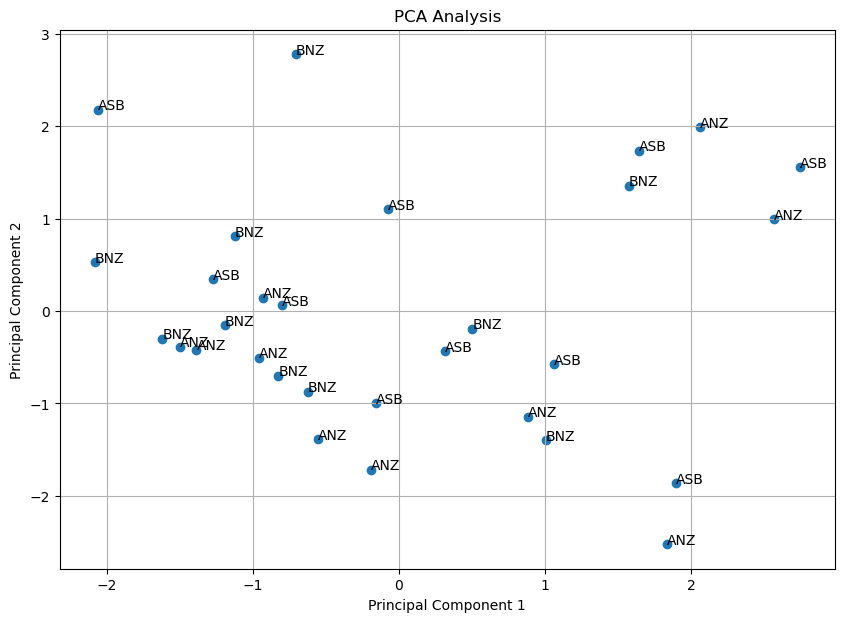

In [17]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load data from Excel file into a pandas DataFrame
ratings_df = pd.read_excel('ratings2.xlsx')  # Assume the data is stored in the file ratings2.xlsx

# Set the bank names as the index
ratings_df.set_index('Bank', inplace=True)

# Convert the DataFrame to a numpy array containing only numerical data
ratings_data = ratings_df.values

# Get the row labels, i.e., the bank names
bank_names = ratings_df.index

# Create a PCA model and specify the number of principal components to retain
pca = PCA(n_components=2)  # Select 2 principal components for demonstration

# Perform PCA transformation on the data
ratings_pca = pca.fit_transform(ratings_data)

# Check the variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio of each component:", explained_variance_ratio)

# Check the loadings of each variable on the principal components
loadings = pca.components_

# Convert the loadings matrix to a DataFrame for easier viewing
loadings_df = pd.DataFrame(loadings.T, index=ratings_df.columns, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
print("Loadings:")
print(loadings_df)

# Plot the PCA-transformed data and add labels
plt.figure(figsize=(10, 7))
plt.scatter(ratings_pca[:, 0], ratings_pca[:, 1])

# Add labels
for i, bank_name in enumerate(bank_names):
    plt.annotate(bank_name, (ratings_pca[i, 0], ratings_pca[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()


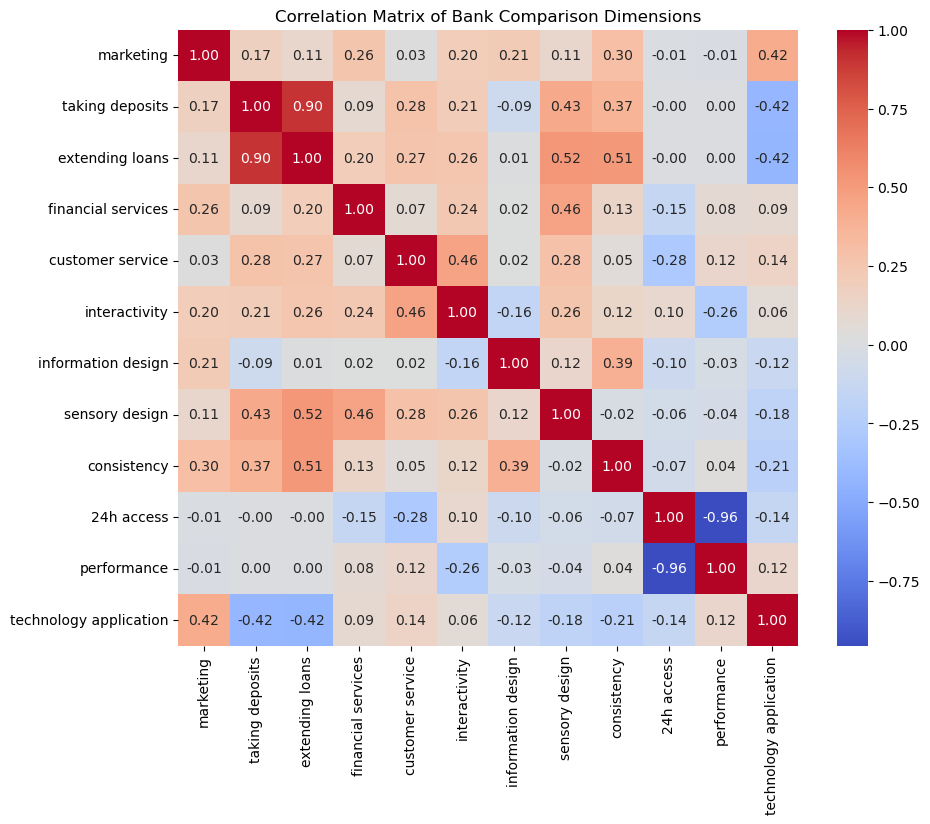

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from Excel file into a pandas DataFrame
bank_comparison_data = pd.read_excel('ratings2.xlsx')

# Calculate the correlation matrix
correlation_matrix = bank_comparison_data.corr()

# Use Seaborn to plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Bank Comparison Dimensions')
plt.show()

